<a href="https://colab.research.google.com/github/anhtran123-max/study_NeuralNetwork/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf

In [11]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [12]:
pwd

'/content/drive/MyDrive/Machine_learning'

In [13]:
cd /content/drive/MyDrive/Machine_learning

/content/drive/MyDrive/Machine_learning


In [14]:
pwd

'/content/drive/MyDrive/Machine_learning'

In [15]:
ls

bbgt.h5  project1.ipynb  test.p  traffic-signs-data.zip  train.p  valid.p


In [16]:
link ="https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [18]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=acf00070e7ada6dd135049d37f7280481840bb004a13569ca39d7c2a3368d338
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [19]:
import wget

In [21]:
wget.download(link)

'traffic-signs-data (1).zip'

In [22]:
data= "./"

In [23]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [24]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [25]:
import pickle

In [26]:
with open(train_link, mode ="rb") as f:
  train=pickle.load(f)

In [27]:
with open(valid_link, mode ="rb") as f:
  valid=pickle.load(f)

In [28]:
with open(test_link, mode ="rb") as f:
  test=pickle.load(f)

In [29]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [30]:
trainX= train["features"]
trainY = train["labels"]

In [31]:
trainX.shape

(34799, 32, 32, 3)

In [32]:
trainX[0].shape

(32, 32, 3)

In [33]:
import matplotlib.pyplot as plt

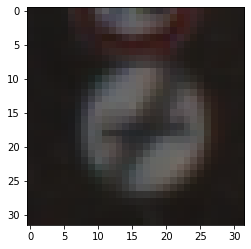

In [34]:
plt.imshow(trainX[0])

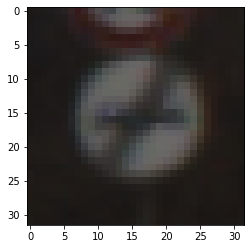

In [35]:
plt.imshow(trainX[2])

In [36]:
trainY[50]

41

In [38]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [39]:
classNames[trainY[50]]

'End of no passing'

In [40]:
from sklearn.utils import shuffle

In [41]:
trainX, trainY = shuffle(trainX, trainY)

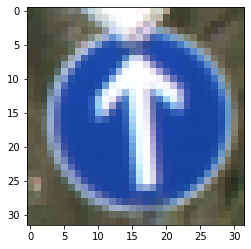

In [42]:
plt.imshow(trainX[0])

In [43]:
classNames[trainY[50]]

'Speed limit (50km/h)'

In [44]:
validX= valid["features"]
validY = valid["labels"]

In [45]:
testX= test["features"]
testY = test["labels"]

In [46]:
trainX= trainX.astype("float") / 255.0
validX= validX.astype("float") / 255.0
testX= testX.astype("float") / 255.0

In [47]:
trainX[0]

array([[[0.24313725, 0.26666667, 0.19215686],
        [0.25882353, 0.27843137, 0.21568627],
        [0.30196078, 0.30196078, 0.24705882],
        ...,
        [0.29019608, 0.28235294, 0.18823529],
        [0.25098039, 0.2627451 , 0.17254902],
        [0.27058824, 0.29411765, 0.21960784]],

       [[0.22352941, 0.25490196, 0.19607843],
        [0.24705882, 0.26666667, 0.21960784],
        [0.29411765, 0.29803922, 0.24313725],
        ...,
        [0.26666667, 0.26666667, 0.19607843],
        [0.29019608, 0.29411765, 0.20784314],
        [0.30980392, 0.31372549, 0.23921569]],

       [[0.25490196, 0.27058824, 0.21960784],
        [0.25098039, 0.26666667, 0.20784314],
        [0.27843137, 0.29019608, 0.22745098],
        ...,
        [0.32156863, 0.30980392, 0.24705882],
        [0.37647059, 0.36470588, 0.26666667],
        [0.35294118, 0.34117647, 0.25490196]],

       ...,

       [[0.33333333, 0.33333333, 0.26666667],
        [0.31372549, 0.31764706, 0.23137255],
        [0.32156863, 0

In [48]:
from sklearn.preprocessing import LabelBinarizer

In [49]:
lb= LabelBinarizer()

In [50]:
trainY= lb.fit_transform(trainY)

In [51]:
validY= lb.fit_transform(validY)

In [52]:
testY= lb.fit_transform(testY)

In [53]:
valid["labels"][0]

41

In [54]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [56]:
model = Sequential()

In [57]:
width = 32
height = 32
classes = 43

In [58]:
shape = (width, height, 3)

In [59]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [60]:
model.add(Activation("relu"))

In [61]:
model.add(BatchNormalization())

In [62]:
model.add(Conv2D(32, (3, 3), padding="same"))

In [63]:
model.add(Activation("relu"))

In [64]:
model.add(BatchNormalization())

In [65]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [66]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [67]:
model.add(Activation("relu"))

In [68]:
model.add(BatchNormalization())

In [69]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [70]:
model.add(Activation("relu"))

In [71]:
model.add(BatchNormalization())

In [72]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [73]:
model.add(Flatten())

In [74]:
model.add(Dense(512))

In [75]:
model.add(Activation("relu"))

In [76]:
model.add(BatchNormalization())

In [77]:
model.add(Dense(classes))

In [78]:
model.add(Activation("softmax"))

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [80]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [81]:
learning_rate = 0.01

In [82]:
epochs = 10
# epoch
# Steps
# 
batch_size = 64

In [83]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [84]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [86]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10
  1/543 [..............................] - ETA: 46s - loss: 0.9558 - accuracy: 0.7031

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


543/543 [==============================] - 34s 63ms/step - loss: 0.7686 - accuracy: 0.7463 - val_loss: 1.1567 - val_accuracy: 0.6401
Epoch 2/10
543/543 [==============================] - 33s 61ms/step - loss: 0.3921 - accuracy: 0.8694 - val_loss: 0.8286 - val_accuracy: 0.7442
Epoch 3/10
543/543 [==============================] - 33s 62ms/step - loss: 0.2417 - accuracy: 0.9200 - val_loss: 0.7110 - val_accuracy: 0.8020
Epoch 4/10
543/543 [==============================] - 34s 63ms/step - loss: 0.1652 - accuracy: 0.9471 - val_loss: 0.7028 - val_accuracy: 0.8057
Epoch 5/10
543/543 [==============================] - 33s 61ms/step - loss: 0.1211 - accuracy: 0.9613 - val_loss: 0.5803 - val_accuracy: 0.8385
Epoch 6/10
543/543 [==============================] - 34s 62ms/step - loss: 0.0941 - accuracy: 0.9699 - val_loss: 0.6810 - val_accuracy: 0.8234
Epoch 7/10
543/543 [==============================] - 33s 62ms/step - loss: 0.0747 - accuracy: 0.9769 - val_loss: 0.6042 - val_accuracy: 0.8528
Epo

In [87]:
model.save("bbgt.h5")

In [88]:
saved_model = tf.keras.models.load_model("bbgt.h5")

In [90]:
result = saved_model.predict(testX[100:101])

In [91]:
result

array([[3.7854676e-05, 9.9851996e-01, 3.1289241e-05, 7.3836226e-08,
        1.1003303e-03, 1.6582453e-06, 9.7066071e-08, 3.2755928e-05,
        1.7854094e-06, 6.1031912e-08, 9.3566017e-09, 5.1623920e-06,
        3.7879172e-08, 3.6032225e-06, 3.4828325e-05, 5.9099239e-08,
        3.8959826e-08, 4.7720987e-09, 1.0006509e-05, 6.4521466e-08,
        1.8995001e-08, 8.3918806e-08, 5.3991793e-09, 4.0776623e-08,
        2.9774877e-05, 1.2502477e-04, 2.2213983e-07, 1.4925851e-06,
        7.5584317e-06, 1.5840554e-08, 5.8688863e-07, 6.1529187e-10,
        9.9996438e-09, 1.4314617e-07, 4.0986144e-08, 4.6243204e-05,
        1.5296507e-07, 3.6219642e-08, 8.4869644e-06, 2.8832732e-08,
        3.9402744e-07, 7.9423899e-09, 6.9233805e-09]], dtype=float32)

In [92]:
import numpy as np

In [93]:
final = np.argmax(result)

In [94]:
final = classNames[final]

In [95]:
final

'Speed limit (30km/h)'

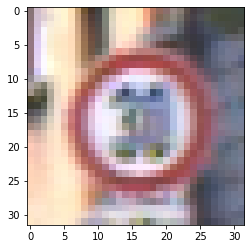

In [96]:
plt.imshow(test["features"][100])